In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB
None


In [5]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


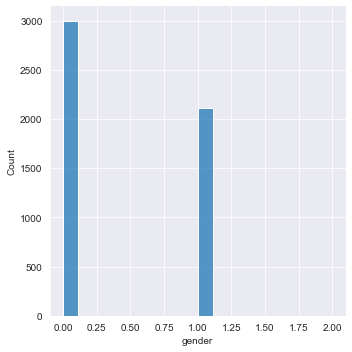

In [6]:
sns.displot(dataset["gender"], kde=False)

<AxesSubplot:xlabel='age', ylabel='count'>

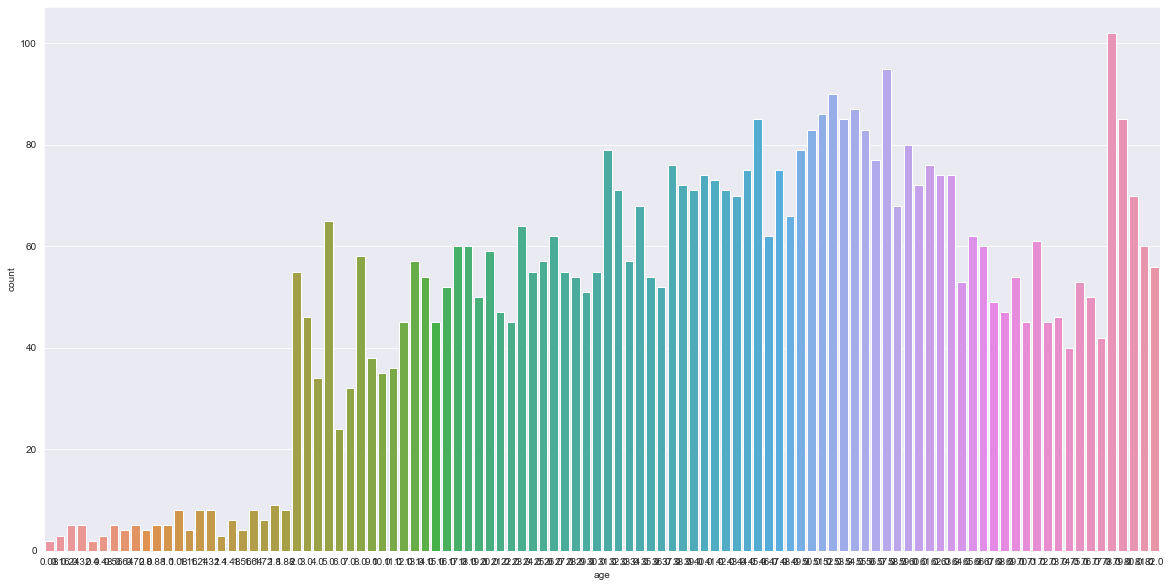

In [7]:
figure,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
sns.countplot(x="age", data=dataset)

In [8]:
#Make groups for age
def age_groups(x):
    if 0.0 <= x < 10.0:
        return "age 0-9"
    elif 10.0 <= x < 20.0:
        return "age 10-19"
    elif 20.0 <= x < 40.0:
        return "age 20-39"
    elif 40.0 <= x < 60.0:
        return "age 40-59"
    else:
        return "age 60-80"

In [9]:
dataset["age_group"] = dataset["age"].apply(lambda x:age_groups(x))

<AxesSubplot:xlabel='age_group', ylabel='count'>

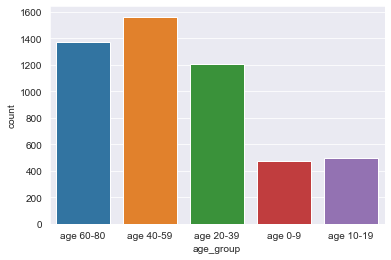

In [10]:
sns.countplot(x="age_group", data=dataset.)

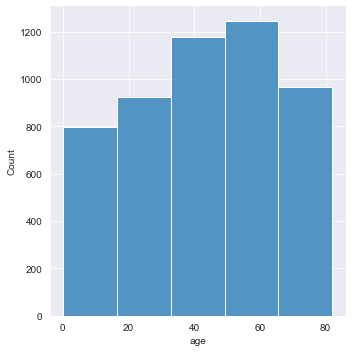

In [11]:
#Alternate way and better way
sns.displot(dataset["age"], kde=False,bins=5)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

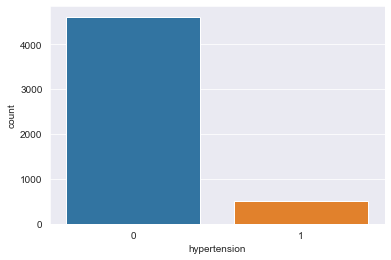

In [12]:
#Let's look at hypertension
sns.countplot(x="hypertension", data=dataset)

In [13]:
dataset["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

<AxesSubplot:>

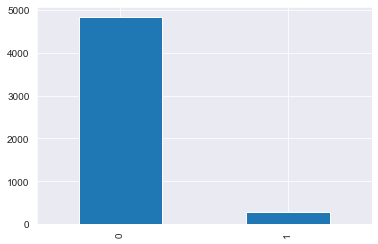

In [14]:
dataset["heart_disease"].value_counts().plot.bar()

<AxesSubplot:xlabel='ever_married', ylabel='count'>

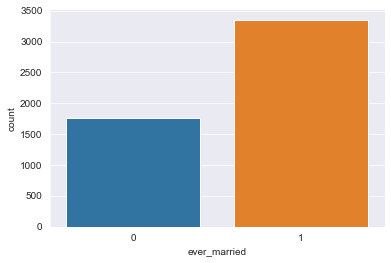

In [15]:
sns.countplot(x="ever_married", data=dataset)

In [16]:
dataset["work_type"].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

([<matplotlib.patches.Wedge at 0x1f656becac0>,
 [Text(-1.0716631969767034, -0.24806852328675585, 'Private'),
  Text(0.9001397216431128, -0.6322566579485418, 'Self-employed'),
  Text(1.0463709109499704, 0.3392755763648913, 'children'),
  Text(0.45952734783433336, 0.9994171384323685, 'Govt_job'),
  Text(0.014877364452567906, 1.0998993881382721, 'Never_worked')],
 [Text(-0.5845435619872926, -0.13531010361095772, '57.241'),
  Text(0.49098530271442514, -0.34486726797193185, '16.027'),
  Text(0.5707477696090747, 0.1850594052899407, '13.444'),
  Text(0.25065128063690906, 0.54513662096311, '12.857'),
  Text(0.008114926065037038, 0.5999451208026939, '0.431')])

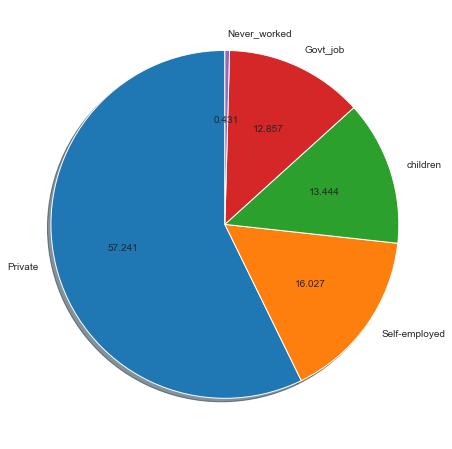

In [17]:
plt.figure(figsize=(8,8))
plt.pie(dataset["work_type"].value_counts(),startangle=90, autopct='%.3f', 
       labels=['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], shadow=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

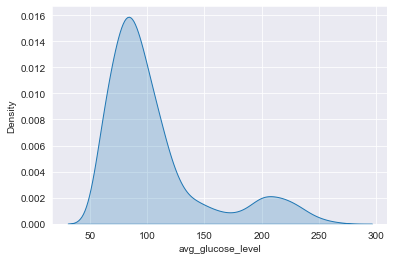

In [18]:
sns.kdeplot(dataset["avg_glucose_level"], shade=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

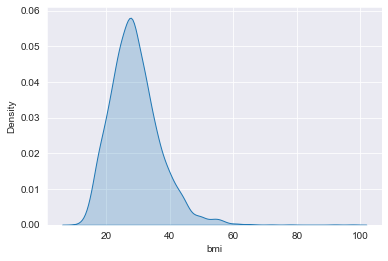

In [19]:
sns.kdeplot(dataset["bmi"], shade=True)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

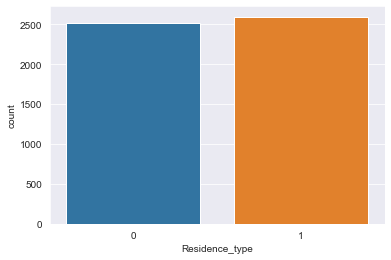

In [20]:
#let's look at residence type
sns.countplot(x="Residence_type", data=dataset)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

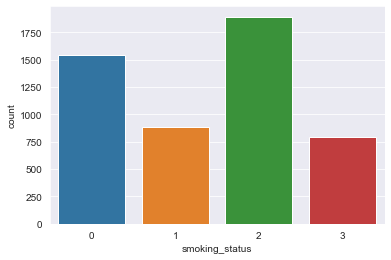

In [21]:
#The data contains equal number of data for both urban and rural residence type feature
sns.countplot(x="smoking_status", data=dataset)

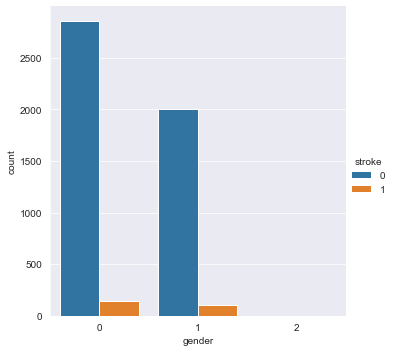

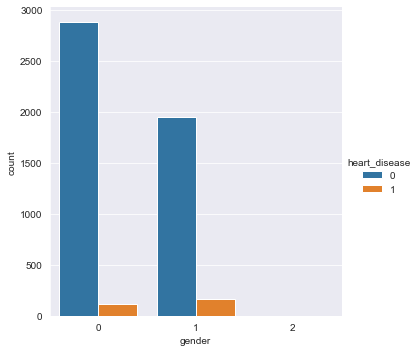

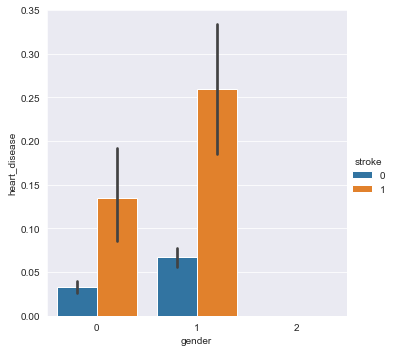

In [22]:
# gender
sns.catplot(x="gender", hue="stroke", kind="count", data=dataset)
sns.catplot(x="gender", hue="heart_disease", kind="count", data=dataset)
sns.catplot(x="gender", y="heart_disease", hue="stroke", kind="bar", data=dataset)

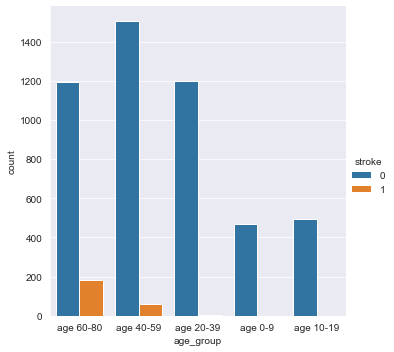

In [23]:
sns.catplot(x="age_group", hue="stroke", kind="count", data=dataset)

<AxesSubplot:>

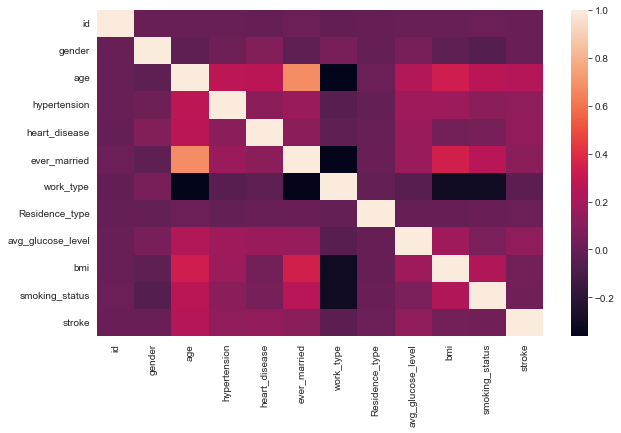

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr())

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

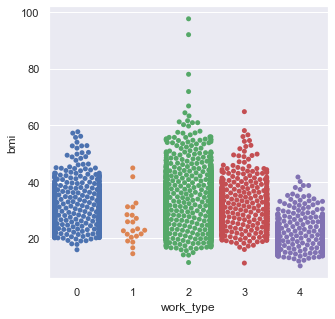

In [25]:
#swarm plot
sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x=dataset["work_type"], y=dataset["bmi"])